In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
from pathlib import Path
import pandas as pd

In [3]:
#path = Path('/home/ubuntu/data/autopsy/milestone/no_preprocessing')
path = Path('/home/ubuntu/data/autopsy/milestone/suicide_homicide_accident_undertermined/no_preprocessing')

In [4]:
df = pd.read_csv(path/'data.csv')
df.head()

,label,text,is_valid
0,Undetermined,\n.MICRO.\nHEART: The left ventricle demonstr...,False
1,Homicide,\n.MICRO.\nNONE\n.LOCATIONTrunk\n.INJURYFirear...,False
2,Suicide,\n.MICRO.\nNONE\n.LOCATIONHead\n.INJURYFirearm...,False
3,Accident,\n.MICRO.\nHeart-Mild myocyte hypertrophy. \n\...,False
4,Accident,\n.MICRO.\nNONE\n.LOCATIONHead and neck\n.INJU...,False


In [5]:
df['text'][1]

"\n.MICRO.\nNONE\n.LOCATIONTrunk\n.INJURYFirearm injury.\n.INJURYDESC.\nEntrance: On the left back, centered approximately 14 inches below the top of the head and 10-1/2 inches left of posterior midline, is an entrance gunshot wound, consisting of a 1/2 inch round defect with circumferential, 1/8 inch dark red marginal abrasion and a rim of purple marginal contusion. No soot, stippling, or unburned gunpowder particles are visible on the skin surrounding this wound.\n\nExit: None.\n\nTerminus: The wound track terminates in the tip of the left scapula.\n\nPath: The hemorrhagic wound track involves the skin and soft tissue of the left back and the left scapula.\n\nAssociated findings: The left scapula is fractured.\n\nRecovery: A copper jacketed missile is recovered from within the left scapula.\n\nTrajectory: The wound track travels from the decedent's back to front, left to right, and downward.\n\n\n\n\n\n\n.LOCATIONTrunk\n.INJURYFirearm injury.\n.INJURYDESC.\nEntrance: On the left back

In [6]:
bs=32

In [7]:
data_lm = TextLMDataBunch.from_csv(path, 'data.csv')

In [8]:
data_lm.show_batch()

idx,text
0,"xxbos \n xxup .micro . \n xxup heart : xxmaj the myocardium is free of inflammatory infiltrate and necrosis . xxmaj several myocytes have hypertrophic change . \n\n xxup lung : xxmaj the sections of lung are free of inflammation and birefringent foreign body material . xxmaj no emphysematous change is present . \n\n xxup liver : xxmaj the liver shows a well - circumscribed nodule , which is entirely"
1,"posterior neck with some having a central brown pointed foreign body consistent with a xxunk . xxmaj multiple xxunk are found on in proximity to the head and neck , but not attached . xxmaj numerous xxunk are xxunk in the scalp hair . \n\n a 6 x 1.5 cm area of erythema is on the left upper eyelid \n xxbos \n xxup .micro . \n xxup none \n .locationhead"
2,the left side of the chest consistent with the shape of the xxunk handle bars \n\n .locationback \n .injuryblunt injury . \n xxup .injurydesc . \n xxmaj bruising along the lower back \n\n .locationextremity \n .injuryblunt injury . \n xxup .injurydesc . \n xxmaj right xxmaj arm : lacerations along the lower forearm and crepitus noted around the right elbow area \n\n .locationextremity \n .injuryblunt injury . \n xxup .injurydesc
3,"are present involving the palpebral conjunctivae of the left eye , both upper and lower eyelids . xxmaj scattered ecchymoses are present on the anterior aspect of the neck , in the supraclavicular region . \n\n xxup projectile : \n a 31.0 grain projectile fragment ( jacket ) was recovered from the right inferior frontal lobe . a 5.2 grain projectile fragment ( jacket ) was recovered from the autopsy"
4,1 cm red brown abrasions on anterior neck \n\n .locationextremities \n .injuryblunt injury . \n xxup .injurydesc . \n xxmaj arms \n 1 . 7 cm x 8 cm red yellow abrasion on upper anterior right arm \n 2 . 3 cm x 3 cm dicing injuries on right elbow \n 3 . 1 cm x 1 cm dried laceration on right hand \n\n xxmaj legs \n 1 . 2


In [9]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1)

In [10]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.587413,2.166289,0.525543


In [11]:
learn.unfreeze()

In [12]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.294035,1.987123,0.553008
2,2.005047,1.792676,0.586397
3,1.804185,1.662223,0.608558
4,1.774296,1.586383,0.621329
5,1.669879,1.536001,0.629717
6,1.597379,1.505136,0.635283
7,1.534639,1.483052,0.639295
8,1.511922,1.470466,0.641943
9,1.489762,1.465764,0.642764
10,1.461876,1.465133,0.642996


In [13]:
learn.save_encoder('fine_tuned_enc')

In [14]:
data_clas = TextClasDataBunch.from_csv(path, 'data.csv', vocab=data_lm.train_ds.vocab, bs=bs)

In [15]:
data_clas.show_batch()

text,target
"xxbos \n xxup .micro . \n xxmaj heart - no significant histopathology \n\n xxmaj lungs - patchy extravasation of red blood cells into the intra - alveolar space \n\n xxmaj kidneys - no significant histopathology \n\n xxmaj liver - no significant histopathology \n\n xxmaj hippocampus - no significant histopathology \n\n xxmaj xxunk - vaginal , anal , and oral smears negative for xxunk components . \n .locationhead and neck \n",Homicide
"xxbos \n xxup .micro . \n xxmaj heart : xxmaj no significant histopathologic abnormalities \n\n xxmaj lungs : xxmaj the lungs show areas of atelectasis , scattered intra - alveolar macrophages , mildly enlarged alveoli with incomplete septae , and rare interstitial carbon pigment . \n\n xxmaj liver : xxmaj mild mixed inflammation is confined to the portal tracts . \n\n xxmaj kidney : xxmaj no significant histopathologic abnormalities \n\n",Homicide
"xxbos \n xxup .micro . \n xxmaj heart : xxmaj sections of the heart show unremarkable endocardial and epicardial surfaces . xxmaj there is no identifiable myocardial ischemia or inflammation . \n\n xxmaj lungs : xxmaj multiple sections of the lungs show atelectasis without inflammation , edema or fibrosis . xxmaj there are focal areas of intra - alveolar hemorrhage . xxmaj no polarizable material is identified . \n\n xxmaj",Homicide
"xxbos \n xxup .micro . \n xxup heart : xxmaj focal fatty infiltration and autolysis . \n\n xxup lungs : xxmaj autolysis . \n\n xxup kidney : xxmaj autolysis . \n\n xxup liver : xxmaj diffuse , predominantly centrilobular steatosis ( micro- and macrovesicular ) and autolysis . \n .locationextremity \n .injuryfirearm injury . \n xxup .injurydesc . \n xxup gunshot xxup wound # 4 ( right arm ) (",Homicide
xxbos \n xxup .micro . \n xxup heart : xxmaj no significant histopathologic diagnosis . \n\n xxup lungs : xxmaj there is patchy blood within alveolar spaces . \n\n xxup liver : xxmaj there is diffuse autolysis . xxmaj inflammation is periportal and consists predominantly of lymphocytes and some neutrophils . \n\n xxup kidney : xxmaj tubular autolysis and no significant histopathologic diagnosis . \n\n xxup uterus : xxmaj non,Homicide


In [16]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')
learn.freeze()

In [17]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.698462,0.492713,0.862720


In [18]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.593093,0.537571,0.860202


In [19]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.552632,8.282073,0.873426


In [20]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.522092,0.518629,0.883501


In [21]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.421751,5.650544,0.884131
2,0.437506,6.634545,0.875315


In [22]:
learn.fit_one_cycle(20, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.426308,2.835510,0.884761
2,0.457131,4.196596,0.882872
3,0.429367,2.952207,0.886650
4,0.407180,3.172106,0.888539
5,0.396071,1.876250,0.887909
6,0.413899,2.423576,0.885390
7,0.422652,1.139119,0.887909
8,0.365665,2.249235,0.886650
9,0.310807,5.741228,0.886650
10,0.354421,5.100532,0.882242


In [23]:
from fastai.vision import *

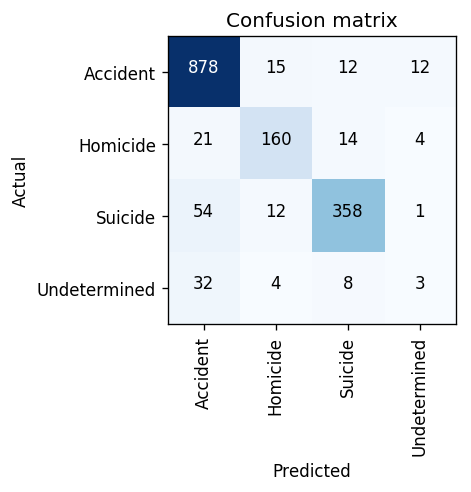

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

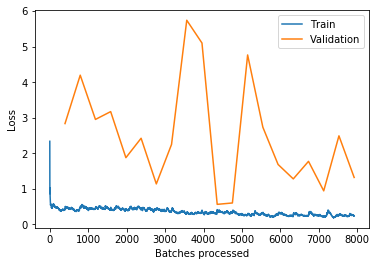

In [25]:
learn.recorder.plot_losses()

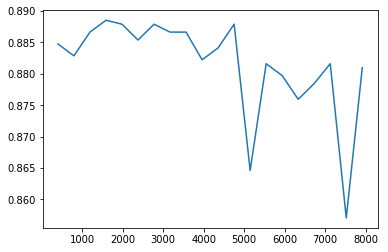

In [26]:
learn.recorder.plot_metrics()